In [1]:
#Load the required libraries

import os
from zipfile import ZipFile
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
#open zip
archive = 'C:/Users/Ark/0_ANALYSIS/DA_projects/gathering_data/4_data.zip'
zip_files = ZipFile(archive)
# zip_f.infolist()

In [3]:
# Read zip
# [text_file.filename for text_file in zip_files.infolist() ]

In [4]:
# Extract zip
import zipfile

with zipfile.ZipFile(archive, 'r') as zip_file:
    zip_file.extractall("C:/Users/Ark/0_ANALYSIS/DA_projects/gathering_data/")

In [5]:
#Take a look on a file
pd.read_csv("C:/Users/Ark/0_ANALYSIS/DA_projects/gathering_data/data/2020-12-03/Alexey_Smirnov/data.csv")

,Unnamed: 0,product_id,quantity
0,0,47,1
1,1,57,1
2,2,14,2
3,3,52,1
4,4,1,4
5,5,94,4


In [6]:
# Work with files

In [7]:
tree = os.walk('C:/Users/Ark/0_ANALYSIS/DA_projects/gathering_data/data/')

In [8]:
for item in tree:
    print(item)

('C:/Users/Ark/0_ANALYSIS/DA_projects/gathering_data/data/', ['2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09'], [])
('C:/Users/Ark/0_ANALYSIS/DA_projects/gathering_data/data/2020-12-03', ['Alexey_Smirnov', 'Anton_Petrov', 'Kirill_Petrov', 'Petr_Fedorov', 'Vasiliy_Ivanov', 'Vasiliy_Petrov'], [])
('C:/Users/Ark/0_ANALYSIS/DA_projects/gathering_data/data/2020-12-03\\Alexey_Smirnov', [], ['data.csv'])
('C:/Users/Ark/0_ANALYSIS/DA_projects/gathering_data/data/2020-12-03\\Anton_Petrov', [], ['data.csv'])
('C:/Users/Ark/0_ANALYSIS/DA_projects/gathering_data/data/2020-12-03\\Kirill_Petrov', [], ['data.csv'])
('C:/Users/Ark/0_ANALYSIS/DA_projects/gathering_data/data/2020-12-03\\Petr_Fedorov', [], ['data.csv'])
('C:/Users/Ark/0_ANALYSIS/DA_projects/gathering_data/data/2020-12-03\\Vasiliy_Ivanov', [], ['data.csv'])
('C:/Users/Ark/0_ANALYSIS/DA_projects/gathering_data/data/2020-12-03\\Vasiliy_Petrov', [], ['data.csv'])
('C:/Users/Ark/0_ANALYSIS/DA_p

In [9]:
#Collect paths together
tree = os.walk('C:/Users/Ark/0_ANALYSIS/DA_projects/gathering_data/data/')
data_files = []
target_file = 'data.csv'

#look for files and paths
for item in tree:
    files = item[-1]
    
    #join files if it contains .csv
    if len(files) > 0 and target_file in files:
        path = os.path.join(item[0], target_file)
        data_files.append(path)

In [10]:
data_files[:5]

['C:/Users/Ark/0_ANALYSIS/DA_projects/gathering_data/data/2020-12-03\\Alexey_Smirnov\\data.csv',
 'C:/Users/Ark/0_ANALYSIS/DA_projects/gathering_data/data/2020-12-03\\Anton_Petrov\\data.csv',
 'C:/Users/Ark/0_ANALYSIS/DA_projects/gathering_data/data/2020-12-03\\Kirill_Petrov\\data.csv',
 'C:/Users/Ark/0_ANALYSIS/DA_projects/gathering_data/data/2020-12-03\\Petr_Fedorov\\data.csv',
 'C:/Users/Ark/0_ANALYSIS/DA_projects/gathering_data/data/2020-12-03\\Vasiliy_Ivanov\\data.csv']

In [11]:
data_files_df = []

for path in data_files:
    df = pd.read_csv(path, index_col = 0)
    
    #assign name and date
    name = path.split('\\')[1]
    date = path.split('/')[7][:10]

    df['name'] = name
    df['date'] = date
    data_files_df.append(df)

In [119]:
#gather lists together
df = pd.concat(data_files_df, ignore_index=True)

In [120]:
df

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
156,66,4,Rostislav_Petrov,2020-12-09
157,39,2,Rostislav_Petrov,2020-12-09
158,82,4,Vasiliy_Ivanov,2020-12-09
159,74,2,Vasiliy_Ivanov,2020-12-09


In [121]:
#Data analysis

In [123]:
#Who buys the most?
top_buyers = df\
    .groupby("name", as_index=False)\
    .agg({"quantity":"sum"})\
    .sort_values("quantity", ascending=False)
top_buyers.head()

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28


In [130]:
#top 10 bestsellers
top_10_bestsellers = df\
    .groupby("product_id", as_index=False)\
    .agg({"quantity":"sum"})\
    .sort_values("quantity", ascending=False)\
    .head(10)

top_10_bestsellers

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


Text(0.5, 1.0, 'top 10 bestsellers')

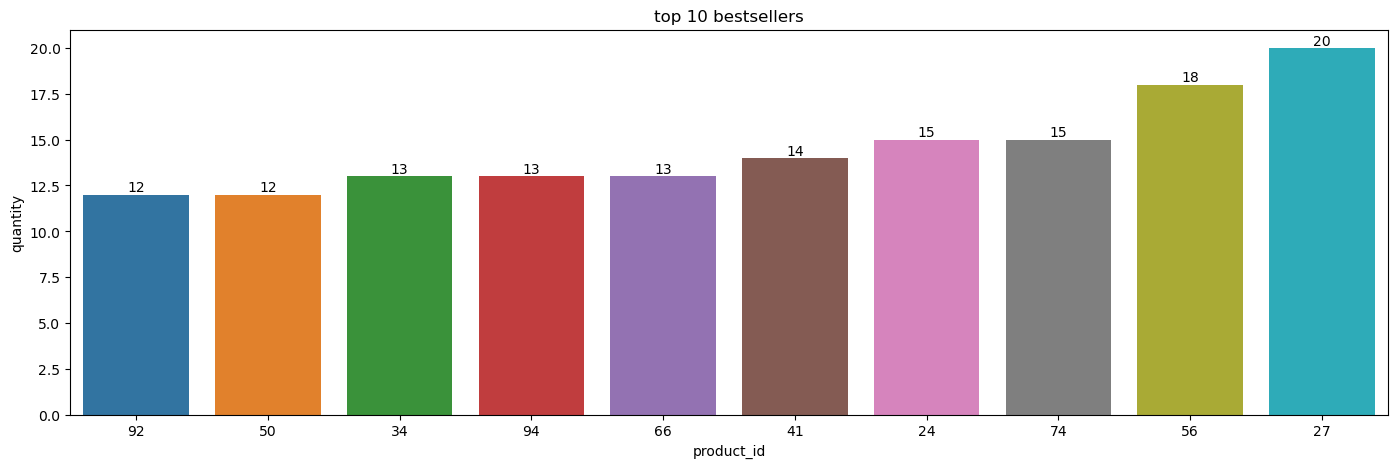

In [136]:
# sales by product_id
plt.figure(figsize=(17, 5))
ax = sns.barplot(data=top_10_bestsellers, x = "product_id", y = "quantity", 
                 order=top_10_bestsellers.sort_values("quantity").product_id)

ax.bar_label(ax.containers[0])
ax.set_title('top 10 bestsellers')

In [137]:
#sales by days

In [140]:
df.date.unique()

array(['2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06',
       '2020-12-07', '2020-12-08', '2020-12-09'], dtype=object)

In [144]:
sales_by_days = df\
    .groupby("date", as_index = False)\
    .agg({"quantity":"sum"})\
    .sort_values("date", ascending=True)

sales_by_days

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


[Text(0, 0, '60'),
 Text(0, 0, '113'),
 Text(0, 0, '61'),
 Text(0, 0, '15'),
 Text(0, 0, '94'),
 Text(0, 0, '68'),
 Text(0, 0, '69')]

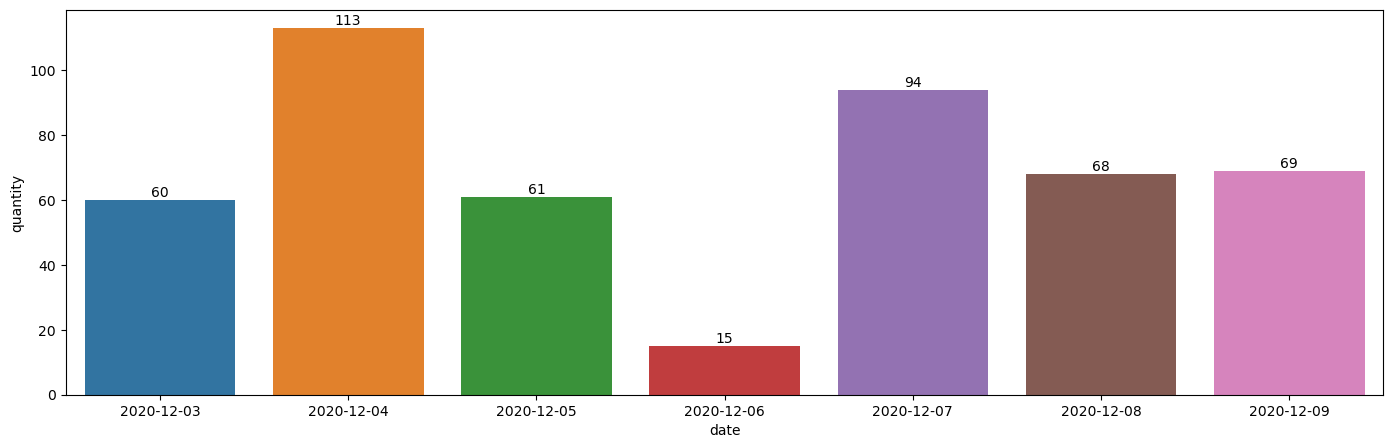

In [145]:
# sales by days
plt.figure(figsize=(17, 5))
ax = sns.barplot(data=sales_by_days, x = "date", y = "quantity")
                 
ax.bar_label(ax.containers[0])

In [138]:
df.head()

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03


In [152]:
# more than 1 sales
same_product = df\
    .groupby(['name', 'product_id'], as_index=False)\
    .date\
    .nunique()\
    .sort_values("date", ascending=False)

In [154]:
same_product.query("date > 1")

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
